<a href="https://colab.research.google.com/github/Vinayak-2003/Vinayak-2003-Transforming-Text-and-Image-using-Gemini-API/blob/main/Gemini_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming Text and Image Processing with Gemini AI


# Setup
### Install the Python SDK
The Python SDK for the Gemini API, is contained in the google-generativeai package. Install the dependency using pip:

In [36]:
pip install -q -U google-generativeai

# Import packages
### Import the necessary packages.

In [6]:
import pathlib
import textwrap
import google.generativeai as genai

#Used to securely store API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('â€¢' , ' *')
  return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

## Setup your API key

In [7]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key = GOOGLE_API_KEY)

# List models


*   gemini-pro: optimized for text-only prompts.
*   gemini-pro-vision: optimized for text-and-images prompts.



In [8]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


# Generate text from text inputs
 For text-only prompts, use the gemini-pro model:

In [9]:
model = genai.GenerativeModel('gemini-pro')

The **generate_content** method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the **GenerativeModel.generate_content** method:

In [13]:
%%time
response = model.generate_content("What is the meaning of study ?")

CPU times: user 113 ms, sys: 10.4 ms, total: 123 ms
Wall time: 8.77 s


In simple cases, the **response.text** accessor is all you need. To display formatted Markdown text, use the **to_markdown** function:

In [14]:
to_markdown(response.text)

>1. **The act or process of learning about a subject or topic.** Studying involves acquiring knowledge and understanding of a particular subject through reading, research, observation, and other activities.
>
>2. **A course of instruction or learning, especially one taken at a school or university.** A study program typically consists of a series of courses or classes that are designed to provide students with a comprehensive understanding of a particular subject or field of study.
>
>3. **An investigation or examination of a subject, topic, or phenomenon.** Studies can be conducted for a variety of purposes, such as to gain knowledge, to solve a problem, or to test a hypothesis.
>
>4. **A detailed report on a particular subject or topic.** Studies typically include a literature review, data analysis, and discussion of the findings.
>
>5. **A room or place where students learn or scholars work.** A study can be a designated room in a school or university, a library, or a home office.
>
>6. **To apply oneself to learning or understanding a subject or topic.** Studying requires focus, concentration, and effort in order to retain and understand information.
>
>7. **To examine or investigate a subject, topic, or phenomenon in a systematic way.** Studying involves gathering information, analyzing data, and drawing conclusions.
>
>8. **To prepare for an exam or test.** Studying helps students to review and reinforce the material they have learned in order to perform well on an assessment.
>
>9. **To pursue a course of instruction or learning, especially at a school or university.** Studying can lead to a degree or certification in a particular field of study.
>
>10. **To engage in intellectual pursuits or research.** Studying is often associated with academia and the pursuit of knowledge for its own sake.

If the API failed to return a result, use **GenerateContentRespose.prompt_feedback** to see if it was blocked due to saftey concerns regarding the prompt.

In [15]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use GenerativeModel.generate_content(..., stream=True).

In [16]:
%%time
response = model.generate_content("What is the meaning of study ?", stream=True)

CPU times: user 137 ms, sys: 18.4 ms, total: 156 ms
Wall time: 10.8 s


In [18]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The word "study" has a broad and multifaceted meaning. Here are some key
________________________________________________________________________________
 definitions and connotations associated with the term:


1. **Learning and Acquisition of Knowledge:**
   - Study refers to the deliberate and systematic process of acquiring knowledge
________________________________________________________________________________
 and understanding through various means, such as reading, research, observation, and experimentation.
   - It involves the active engagement of the mind in order to comprehend and retain information.

2. **Academic Pursuit:**
   - In an educational context, study refers to the formal learning that takes place in schools, colleges
________________________________________________________________________________
, and universities.
   - Students engage in studying to master specific subjects or fields of knowledge, such as science, history, literature, or mathematics.

3. **

The prompt_feedback attribute works:

In [19]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

# Generate text from image and text inputs
Gemini provides a multimodal model **(gemini-pro-vision)** that accepts both text and images and inputs. The GenerativeModel.generate_content API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [23]:
!curl -o image.jpg https://i.pinimg.com/736x/d0/0b/f8/d00bf86933543a764c971cca785fdc32.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82583  100 82583    0     0   496k      0 --:--:-- --:--:-- --:--:--  497k


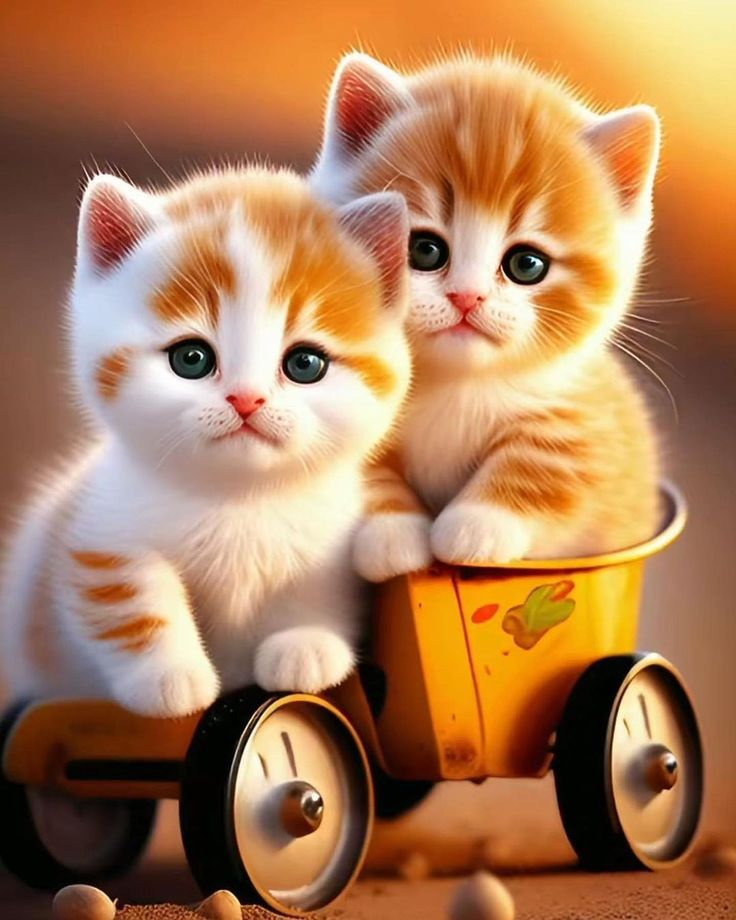

In [24]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

Use the **gemini-pro-vision** model and pass the image to the model with generate_content.



In [25]:
model = genai.GenerativeModel('gemini-pro-vision')

In [26]:
response = model.generate_content(img)

to_markdown(response.text)

> The picture shows two cute kittens sitting in a toy car. The kittens are both orange and white, and they have big green eyes. They are looking at the camera with curious expressions. The car is yellow and has red wheels. It is sitting on a sandy surface. The background is a blurry orange color.

To provide both text and images in a prompt, pass a list containing the strings and images:



In [27]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of two kitten going on a trip.", img], stream=True)
response.resolve()

In [28]:
to_markdown(response.text)

> ## Two kittens go on a trip
>
>Once upon a time, there were two kittens named Mittens and Mittens Jr. They were best friends and loved to play together. One day, they were playing in the backyard when they saw a big, red wagon. They had never seen anything like it before and were curious. They decided to climb inside and take a ride.
>
>The wagon started to roll down the hill, and the kittens were having a lot of fun. But then, the wagon started to go faster and faster. The kittens were scared, but they didn't know how to stop the wagon. They held on tight and screamed for help.
>
>Just then, a little boy named Billy was walking by. He saw the kittens in trouble and ran over to help. He grabbed the wagon and stopped it just in time. The kittens were so grateful to Billy for saving them. They purred and rubbed against his legs.
>
>Billy took the kittens home with him and gave them some food and water. The kittens were so happy to be safe and sound. They curled up on Billy's lap and fell asleep.
>
>Billy's parents were so happy to see him helping the kittens. They told him that he was a hero. Billy was proud of himself for saving the kittens, and he knew that he would never forget that day.
>
>The kittens stayed with Billy and his family for a few days. They had a lot of fun playing with Billy and his toys. But then, it was time for the kittens to go home. Billy was sad to see them go, but he knew that they would be happy with their mom.
>
>The kittens went back to their mom, and they were so happy to see her. They told her all about their adventure with Billy. Their mom was so proud of them for being brave and adventurous.
>
>The kittens lived happily ever after with their mom. They never forgot their adventure with Billy, and they always remembered the day that he saved them.

# Chat conversations
Gemini enables you to have freeform conversations across multiple turns. The ChatSession class simplifies the process by managing the state of the conversation, so unlike with **generate_content**, you do not have to store the conversation history as a list.

Initialize the chat:

In [29]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [30]:
response = chat.send_message("Conversation between two friends for planning a trip to kasol.")
to_markdown(response.text)

>Friend 1: Hey, I'm thinking about planning a trip to Kasol, have you ever been there?
>
>Friend 2: Kasol? That sounds like a great idea! I've been wanting to go there for a while now. What are your thoughts?
>
>Friend 1: Well, I was thinking we could go for a long weekend, maybe 4 days and 3 nights. We can leave on Friday after work and come back on Monday.
>
>Friend 2: That sounds doable, but we should start planning soon if we want to book everything in time.
>
>Friend 1: Definitely. First things first, let's figure out our transportation and accommodation. I've heard there are some great hostels and guesthouses in Kasol that won't break the bank.
>
>Friend 2: That's good to know. We can start looking at options online and compare prices.
>
>Friend 1: Sounds like a plan. Once we have our accommodation sorted, we can start thinking about activities. I've heard Kasol is a great place for trekking and nature walks.
>
>Friend 2: Oh yeah, I've seen some amazing pictures of the Parvati Valley. We could definitely go for a trek one day.
>
>Friend 1: That's a great idea! We can also explore the local culture and visit some of the cafes and restaurants in Kasol. I've heard there's a thriving food scene there.
>
>Friend 2: Yes, and we could try some of the local dishes and experience the flavors of the region.
>
>Friend 1: This trip is going to be amazing! I can't wait to explore Kasol with you.
>
>Friend 2: Me too! Let's start making our bookings and before you know it, we'll be on our way to Kasol.
>
>[The two friends continue to discuss their plans, make bookings, and eagerly await their upcoming trip to Kasol.]

In [31]:
chat.history

[parts {
   text: "Conversation between two friends for planning a trip to kasol."
 }
 role: "user",
 parts {
   text: "Friend 1: Hey, I\'m thinking about planning a trip to Kasol, have you ever been there?\n\nFriend 2: Kasol? That sounds like a great idea! I\'ve been wanting to go there for a while now. What are your thoughts?\n\nFriend 1: Well, I was thinking we could go for a long weekend, maybe 4 days and 3 nights. We can leave on Friday after work and come back on Monday.\n\nFriend 2: That sounds doable, but we should start planning soon if we want to book everything in time.\n\nFriend 1: Definitely. First things first, let\'s figure out our transportation and accommodation. I\'ve heard there are some great hostels and guesthouses in Kasol that won\'t break the bank.\n\nFriend 2: That\'s good to know. We can start looking at options online and compare prices.\n\nFriend 1: Sounds like a plan. Once we have our accommodation sorted, we can start thinking about activities. I\'ve heard

You can keep sending messages to continue the conversation. Use the **stream=True** argument to stream the chat:

In [33]:
response = chat.send_message("Conversation between two friends for planning a trip to kasol.")

for chunk in response:
  print(chunk.text)
  print('_'*100)

**[Scene: Two friends, Alex and Ben, are sitting in a cafe, planning their upcoming trip to Kasol.]**

**Alex:** So, we're finally going to Kasol! I can't wait to experience the beauty of the Parvati Valley.

**Ben:** Me too, man! I've heard so many great things about this place.

**Alex:** I've been doing some research, and I've found a few places we should definitely check out.

**Ben:** Like what?

**Alex:** Well, there's the Parvati River, of course. We can go for a swim, or just relax on the banks and soak in the views.

**Ben:** That sounds amazing. I also want to visit the Manikaran Sahib Gurudwara. I've heard it's a really special and spiritual place.

**Alex:** Yes, that's on my list too. And we have to try the local food. I've heard the cuisine in Kasol is incredible.

**Ben:** Oh, I'm so excited for that! I love trying new and unique dishes.

**Alex:** We should also try to go for a trek. I've seen some pictures of the Parvati Valley, and it looks absolutely stunning.

**Ben

**glm.Content** objects contain a list of **glm.Part** objects that each contain either a text (string) or inline_data (**glm.Blob**), where a blob contains binary data and a **mime_type**. The chat history is available as a list of **glm.Content** objects in **ChatSession.history**:

In [35]:
for message in chat.history:
  display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

>**user**: Conversation between two friends for planning a trip to kasol.

>**model**: Friend 1: Hey, I'm thinking about planning a trip to Kasol, have you ever been there?
>
>Friend 2: Kasol? That sounds like a great idea! I've been wanting to go there for a while now. What are your thoughts?
>
>Friend 1: Well, I was thinking we could go for a long weekend, maybe 4 days and 3 nights. We can leave on Friday after work and come back on Monday.
>
>Friend 2: That sounds doable, but we should start planning soon if we want to book everything in time.
>
>Friend 1: Definitely. First things first, let's figure out our transportation and accommodation. I've heard there are some great hostels and guesthouses in Kasol that won't break the bank.
>
>Friend 2: That's good to know. We can start looking at options online and compare prices.
>
>Friend 1: Sounds like a plan. Once we have our accommodation sorted, we can start thinking about activities. I've heard Kasol is a great place for trekking and nature walks.
>
>Friend 2: Oh yeah, I've seen some amazing pictures of the Parvati Valley. We could definitely go for a trek one day.
>
>Friend 1: That's a great idea! We can also explore the local culture and visit some of the cafes and restaurants in Kasol. I've heard there's a thriving food scene there.
>
>Friend 2: Yes, and we could try some of the local dishes and experience the flavors of the region.
>
>Friend 1: This trip is going to be amazing! I can't wait to explore Kasol with you.
>
>Friend 2: Me too! Let's start making our bookings and before you know it, we'll be on our way to Kasol.
>
>[The two friends continue to discuss their plans, make bookings, and eagerly await their upcoming trip to Kasol.]

>**user**: Conversation between two friends for planning a trip to kasol.

>**model**: **Scene:** Two friends, Sarah and Jessica, are sitting in a coffee shop, discussing their upcoming trip to Kasol.
>
>**Sarah:** So, we're finally going to Kasol! I can't believe it's actually happening.
>
>**Jessica:** Me neither! I've been dreaming of this trip for months.
>
>**Sarah:** I've been doing some research, and I've found a few places we should definitely check out.
>
>**Jessica:** Like what?
>
>**Sarah:** Well, there's the Parvati River, of course. We can go for a swim or just relax on the banks and enjoy the scenery.
>
>**Jessica:** That sounds amazing. I also want to visit the Manikaran Sahib Gurudwara. I've heard it's a really special place.
>
>**Sarah:** Yes, that's on my list too. And we have to try the local cuisine. I've heard the food in Kasol is incredible.
>
>**Jessica:** Oh, I'm so excited for that! I love trying new foods.
>
>**Sarah:** We should also try to go for a trek. I've seen some pictures of the Parvati Valley, and it looks breathtaking.
>
>**Jessica:** I'm up for that. I love hiking and exploring new places.
>
>**Sarah:** This trip is going to be unforgettable. I can't wait to share this experience with you.
>
>**Jessica:** Me too! Let's start planning our itinerary and making our bookings.
>
>[The two friends continue to discuss their plans, make notes on their phones, and eagerly await their upcoming adventure in Kasol.]

>**user**: Conversation between two friends for planning a trip to kasol.

>**model**: **[Scene: Two friends, Alex and Ben, are sitting in a cafe, planning their upcoming trip to Kasol.]**
>
>**Alex:** So, we're finally going to Kasol! I can't wait to experience the beauty of the Parvati Valley.
>
>**Ben:** Me too, man! I've heard so many great things about this place.
>
>**Alex:** I've been doing some research, and I've found a few places we should definitely check out.
>
>**Ben:** Like what?
>
>**Alex:** Well, there's the Parvati River, of course. We can go for a swim, or just relax on the banks and soak in the views.
>
>**Ben:** That sounds amazing. I also want to visit the Manikaran Sahib Gurudwara. I've heard it's a really special and spiritual place.
>
>**Alex:** Yes, that's on my list too. And we have to try the local food. I've heard the cuisine in Kasol is incredible.
>
>**Ben:** Oh, I'm so excited for that! I love trying new and unique dishes.
>
>**Alex:** We should also try to go for a trek. I've seen some pictures of the Parvati Valley, and it looks absolutely stunning.
>
>**Ben:** I'm up for that. I love hiking and exploring new places.
>
>**Alex:** This trip is going to be unforgettable, dude. I can't wait to share this experience with you.
>
>**Ben:** Me too, man! Let's start planning our itinerary and making our bookings.
>
>[The two friends continue to discuss their plans, make notes on their phones, and eagerly await their upcoming adventure in Kasol.]